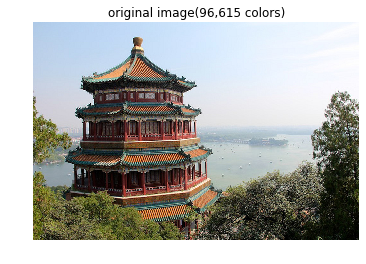

[[[174 201 231]
  [174 201 231]
  [174 201 231]
  ...
  [250 251 255]
  [250 251 255]
  [250 251 255]]

 [[172 199 229]
  [173 200 230]
  [173 200 230]
  ...
  [251 252 255]
  [251 252 255]
  [251 252 255]]

 [[174 201 231]
  [174 201 231]
  [174 201 231]
  ...
  [252 253 255]
  [252 253 255]
  [252 253 255]]

 ...

 [[ 88  80   7]
  [147 138  69]
  [122 116  38]
  ...
  [ 39  42  33]
  [  8  14   2]
  [  6  12   0]]

 [[122 112  41]
  [129 120  53]
  [118 112  36]
  ...
  [  9  12   3]
  [  9  15   3]
  [ 16  24   9]]

 [[116 103  35]
  [104  93  31]
  [108 102  28]
  ...
  [ 43  49  39]
  [ 13  21   6]
  [ 15  24   7]]]


(427, 640, 3)

In [42]:
#Image Quantization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors=3
#will give 64 labels to the image 0,1,2,,,64

#Load the summer PAlace photo
#china = np.array(Load_sample_image("china.jpg"))
china=load_sample_image("china.jpg")
#plt.figure(1)
plt.clf() #clear axis
#from PIL import Image
plt.axis('off')
plt.title('original image(96,615 colors)')
plt.imshow(china)
plt.show()
print(china)
china.shape


In [29]:
#rescale the colors so they lie between a range
china=china/255.0
#print(china)
china.shape

#Load Image and transform to a 2D numpy array. Reshape the image
w,h,d = china.shape

image_array = china.reshape(w*h,d)
print(image_array.shape)

(273280, 3)


Fitting model on a small sub-sample of the data : 


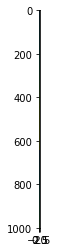

Done in 0.199466s : 


In [30]:
print("Fitting model on a small sub-sample of the data : ")
t0=time()
# we are taking first1000 pixels and shuffling them
image_array_sample=shuffle(image_array,random_state=0)[:1000]
plt.imshow(image_array[:1000])
plt.show()
kmeans=KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
#apply kmeans to pick means and clusters on thatsample image array of 1000
print("Done in %03fs : "%(time()-t0))

In [33]:
#gets labels for all centroids on the complete image
t0=time()
labels=kmeans.predict(image_array)
print(labels)
print(kmeans.cluster_centers_)
#cluster_centers_ would give 64 centres if given 64 n_colors
#It would porduce 2 centers if n_colors=2

print(labels.size)

[0 0 0 ... 1 1 1]
[[0.84182147 0.88148435 0.92131063]
 [0.17717087 0.15148969 0.10430354]
 [0.50842473 0.46741442 0.35893985]]
273280


In [39]:
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_.shape[1])
print("done in %0.3f s. "%(time()-t0))

(3, 3)
3
done in 497.361 s. 


In [52]:
# Recreate the whole img according to the labels and each pixel
def recreate_image(c,labels,w,h,d):
    #now again 3 w h used
    image=np.zeros((w,h,d))
    label_idx=0
    #now label each pixel according to the limited labels
    for i in range(w):
        for j in range(h):
            image[i][j]=c[labels[label_idx]]
            #print(labels[label_idx])
            #print(c[labels[label_idx]])
            #print(image[i][j])
            label_idx+=1
    
    print(label_idx)
    return image


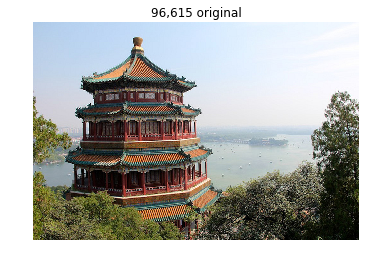

273280


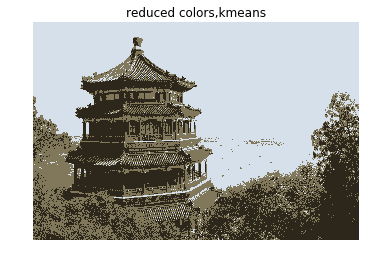

In [53]:
plt.figure(1)
plt.axis('off')
plt.title('96,615 original')
plt.imshow(china)
plt.show()
plt.figure(1)
plt.axis('off')
plt.title('reduced colors,kmeans')
plt.imshow(recreate_image(kmeans.cluster_centers_,labels,w,h,d))
plt.show()